In [1]:
from tensorflow import keras


model1 = keras.models.load_model('../models/pre_model_1_1_10_epochs.h5')
model2 = keras.models.load_model('../models/pre_model_2_6.keras')
model5 = keras.models.load_model('../models/pre_model_5_1_10_epochs.h5')
model6 = keras.models.load_model('../models/pre_model_6_1_20_2_epochs.h5')
model7 = keras.models.load_model('../models/pre_model_7_1_10_epochs.h5')


In [19]:
model_2 = keras.models.load_model('../models/pre_model_2_1.h5')

In [73]:
all_models = [model1,model2, model5,model6,model7]
rules = [
            "Kein Scooter",
            "Scooter unvollständig/zu wenig Umgebung",
            "Scooter auf Grünfläche",
            "Scooter blockiert Fahrradständer",
            "Scooter steht an ÖPNV Haltestelle / Parkverbot",
        ]

In [3]:
from PIL import Image
import numpy as np
# Function to load and resize an image
def load_image(img_path):
    with Image.open(img_path) as img:
        img = img.resize((512, 512))
        img = img.convert('RGB')  # Ensure image is in RGB format
        return np.array(img)


In [8]:
import matplotlib.pyplot as plt

def show_img(img_array):
    img_array.astype('uint8')
    plt.imshow(img_array)
    plt.axis('off')  # Hide the axes
    plt.show()

In [17]:
import os
import random
import cv2

folder_path = "../Yoio_Park_Proof"
#img_path = os.path.join(folder_path, random_image_file)

def load_image2(img_path, target_size = (512, 512)):
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, target_size)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Ensure image is in RGB format
        img = img / 255.0  # Normalize image to the range [0, 1]
    return img
    

def predict_image(models,img_path):
  img = load_image2(img_path)
  img_array = np.expand_dims(img, axis=0)
  for model in models:
        predictions = model.predict(img_array)

        if predictions[0][1]>0.5:
          print("Verstoß")
          print(rules[models.index(model)])
          break
        else:
          print("Richtig")


  show_img(img)


[1, 0] = good, [0, 1] = bad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
[[0.7585244  0.24147561]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[[1.0000000e+00 6.4721544e-09]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Richtig
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Richtig
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Richtig
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Verstoß
Scooter blockiert Fahrradständer


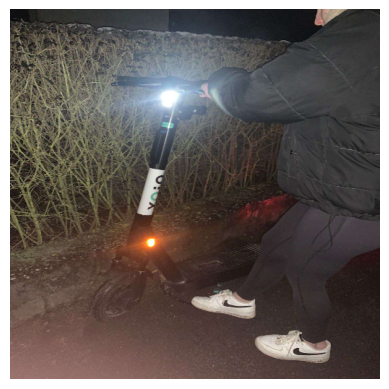

In [65]:
random_image_file = random.choice(os.listdir("../Yoio_Park_Proof"))
print("[1, 0] = good, [0, 1] = bad")
print(model2.predict(np.expand_dims(load_image2(os.path.join(folder_path, random_image_file)), axis=0)))
print(model_2.predict(np.expand_dims(load_image2(os.path.join(folder_path, random_image_file)), axis=0)))
predict_image(all_models,os.path.join(folder_path, random_image_file))

In [67]:
import pandas as pd
balanced_labels = pd.read_csv('../all_models_combine/chosen_labels_not_all_rules.csv', sep=';',index_col=False)
balanced_labels.describe()

,Rule1,Rule2,Rule5,Rule6,Rule7
count,840.000000,840.000000,840.000000,840.000000,840.000000
mean,0.255952,0.266667,0.280952,0.498810,0.140476
std,0.436655,0.442480,0.449732,0.500296,0.347687
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:

import pandas as pd
import numpy as np
import cv2

predictions_df = pd.DataFrame(columns=["Image_name","Rule1","Rule2","Rule5","Rule6","Rule7"])
folder_path = "../Yoio_Park_Proof/"

def load_image2(img_path, target_size = (512, 512)):
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, target_size)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Ensure image is in RGB format
        img = img / 255.0  # Normalize image to the range [0, 1]
    return img

i=0
while i < min(1000, len(balanced_labels)):
    
    img_name=balanced_labels['Image_name'][i]
    img = load_image2(folder_path+img_name)
    img_array = np.expand_dims(img, axis=0)
    predictions_array =[img_name]

    for model in all_models:
      predictions = model.predict(img_array)

      if predictions[0][1]>0.5:
        int_pred=1
      else:
        int_pred=0   
      predictions_array.append(int_pred)
      
    predictions_df.loc[len(predictions_df)] = predictions_array
    i += 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━

In [75]:
#print(predictions_df.sample(10))
print(predictions_df.describe())
print("\n")
print(balanced_labels.describe())

            Rule1       Rule2       Rule5       Rule6       Rule7
count  840.000000  840.000000  840.000000  840.000000  840.000000
mean     0.253571    0.111905    0.359524    0.548810    0.229762
std      0.435314    0.315437    0.480147    0.497908    0.420930
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.000000    0.000000    0.000000    0.000000
50%      0.000000    0.000000    0.000000    1.000000    0.000000
75%      1.000000    0.000000    1.000000    1.000000    0.000000
max      1.000000    1.000000    1.000000    1.000000    1.000000


            Rule1       Rule2       Rule5       Rule6       Rule7
count  840.000000  840.000000  840.000000  840.000000  840.000000
mean     0.255952    0.266667    0.280952    0.498810    0.140476
std      0.436655    0.442480    0.449732    0.500296    0.347687
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.000000    0.000000    0.000000    0.000000
50%     

In [77]:
#print(predictions_df.head(10).sort_values(by='Image_name'))
print(balanced_labels.head(10))

                                          Image_name  Rule1  Rule2  Rule5  \
0  1611318951351de9ad80543f8df25136941416a5847510...      0      0      0   
1  1604915354e5320dd8d7f02d6d0d2fbc70c021118d41e8...      0      0      0   
2  1611884710cd57845ef857c0107d952f1e7c2fcfb37002...      0      0      0   
3  16008369091cb457fd9ec90f1bd0690ebc67ed9d4a1de6...      0      0      0   
4  160886776228b01cf7ab84f8a8b32523b487b7c8ebff5a...      0      0      0   
5  161424233971449bf08cbd609543cdd1ce14c62167b870...      0      0      0   
6  1592411152b0fdb6fbca67dfb552c6176b0e9544e299f9...      0      0      0   
7  1614085036d2f34f972e4d9923e86a565fa1c1f4b5e02e...      0      0      0   
8  1607937811963ac83983063cb8f21be6b27dac68ca0cc3...      0      0      0   
9  1607451914b3e134aa33fee52d56f3cbd5f6f9fbe3595c...      0      0      0   

   Rule6  Rule7  
0      0      0  
1      0      0  
2      0      0  
3      0      0  
4      0      0  
5      0      0  
6      0      0  
7      0

In [78]:
predictions_df.to_csv('../all_models_combine/predicted_labels_not_all_rules_3.csv', sep=';', index=False)